In [24]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings 
warnings.filterwarnings('ignore')
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix
#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)

In [25]:
url = 'https://raw.githubusercontent.com/meet-vasita/Bank-Customer-Churn-Prediction/refs/heads/main/Dataset/Churn_Data.csv'

df = pd.read_csv(url)
df.sample(frac=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8452,8453,15601410,Tien,744,Spain,Female,46.0,1,0.00,3,1.0,1.0,177431.59,1
7676,7677,15722535,Ireland,457,France,Female,33.0,7,127837.54,1,0.0,1.0,60013.17,0
9031,9032,15742323,Barese,541,France,Male,39.0,7,0.00,2,1.0,0.0,19823.02,0
1954,1955,15600734,Townsend,624,Spain,Male,51.0,5,174397.21,2,1.0,1.0,172372.63,0
9370,9371,15732438,Cheng,561,France,Male,43.0,4,0.00,4,0.0,0.0,18522.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,5597,15796957,Iadanza,597,Spain,Male,35.0,9,0.00,3,0.0,1.0,73181.39,1
6241,6242,15571995,Harper,775,Germany,Female,33.0,1,118897.10,2,1.0,1.0,26362.40,0
4510,4511,15657747,Zito,611,Germany,Female,43.0,9,127216.31,2,0.0,1.0,17913.25,0
3802,3803,15629551,Cattaneo,615,Germany,Female,44.0,9,126104.98,2,0.0,1.0,110718.02,0


In [26]:
df.shape

(10002, 14)

In [27]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


<Axes: >

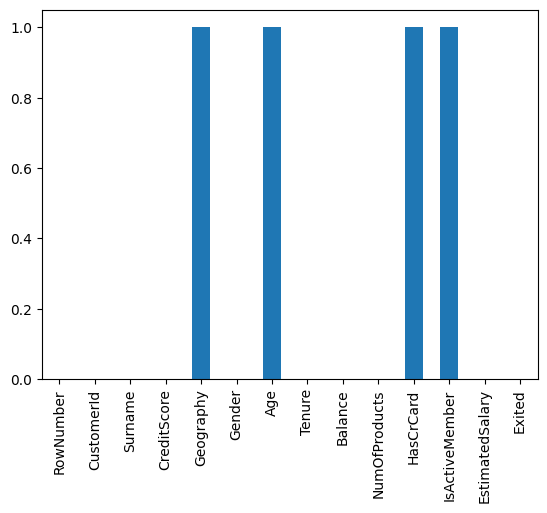

In [29]:
df.isna().sum().plot(kind='bar')

In [30]:
df['IsActiveMember'].fillna(df['IsActiveMember'].median(),inplace=True)

In [31]:
df['HasCrCard'].fillna(df['HasCrCard'].median(),inplace=True)

In [32]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [33]:
df['Geography'].fillna('France',inplace=True)

In [34]:
df['Geography'].mode()

0    France
Name: Geography, dtype: object

<Axes: >

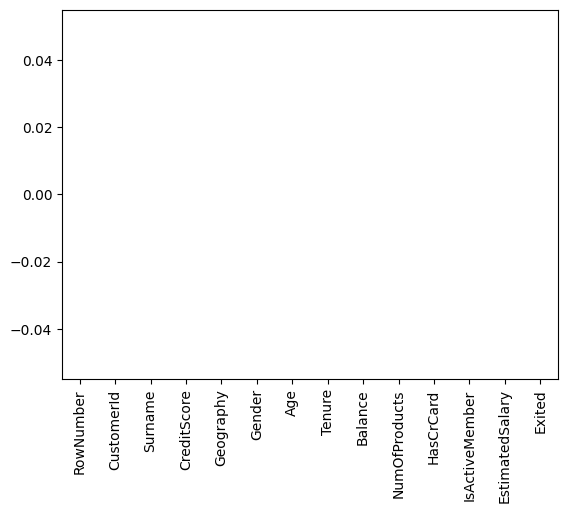

In [35]:
df.isna().sum().plot(kind='bar')

In [36]:
#Evaluate Descriptive Stats: EDA

#Step 1: Segregate Categorical Columns and Numerical Columns

numerical_col = df.select_dtypes(include=['int64','float64'])  
categorical_col = df.select_dtypes(include=object)

In [37]:
#Step2 : Evaluate Descriptive Stats

'''
Step1: Creating a blank list
Step1: Using Ordered Dict Create Dictionary
Step1: append list : stats[]
Step1: Convert appended list into a dataframe

'''

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var(),
        'Count':df[i].count()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance,Count
0,RowNumber,5.001500e+03,5001.50,9999.00,2501.25,7.501750e+03,5000.5000,2887.472338,-8.301804e-07,-1.200001,10000.00,1.00,8.337497e+06,10002
1,CustomerId,1.569093e+07,15690732.00,15628319.00,15628524.75,1.575323e+07,124700.7500,71931.769345,1.379949e-03,-1.195972,15815690.00,15565701.00,5.174179e+09,10002
2,CreditScore,6.505551e+02,652.00,850.00,584.00,7.180000e+02,134.0000,96.661615,-7.187787e-02,-0.426340,850.00,350.00,9.343468e+03,10002
3,Age,3.892212e+01,37.00,37.00,32.00,4.400000e+01,12.0000,10.486693,1.011392e+00,1.396161,92.00,18.00,1.099707e+02,10002
4,Tenure,5.012498e+00,5.00,2.00,3.00,7.000000e+00,4.0000,2.891973,1.126740e-02,-1.165051,10.00,0.00,8.363507e+00,10002
5,Balance,7.649111e+04,97198.54,0.00,0.00,1.276478e+05,127647.8400,62393.474144,-1.412948e-01,-1.489231,250898.09,0.00,3.892946e+09,10002
6,NumOfProducts,1.530194e+00,1.00,1.00,1.00,2.000000e+00,1.0000,0.581639,7.454846e-01,0.582777,4.00,1.00,3.383043e-01,10002
7,HasCrCard,7.055589e-01,1.00,1.00,0.00,1.000000e+00,1.0000,0.455814,-9.021225e-01,-1.186412,1.00,0.00,2.077663e-01,10002
8,IsActiveMember,5.149970e-01,1.00,1.00,0.00,1.000000e+00,1.0000,0.499800,-6.002401e-02,-1.996796,1.00,0.00,2.498001e-01,10002
9,EstimatedSalary,1.000833e+05,100185.24,24924.92,50983.75,1.493837e+05,98399.9025,57508.117802,2.320765e-03,-1.181446,199992.48,11.58,3.307184e+09,10002


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])



In [ ]:
# Concept of Data Leakage
'''
Step1: Split the dataset into X and y
        X: Independent
        y: Dependent / Target

Step2: Split the data into train and test
        train data: Seen Data
        test data: Unseen Data

Step3: Try Balance the target column in case of classification problem
        Imbalance Technique: 1. Oversampling 2. Undersampling
    
Step4: Use Scaling Technique:
        MinMax Scaler
        Robust Scaler
        Standard Scaler
 
Step5: Model Building
'''

'\nStep1: Split the dataset into X and y\n        X: Independent\n        y: Dependent / Target\n\nStep2: Split the data into train and test\n        train data: Seen Data\n        test data: Unseen Data\n\nStep3: Try Balance the target column in case of classification problem\n        Imbalance Technique: 1. Oversampling 2. Undersampling\n    \nStep4: Use Scaling Technique:\n        MinMax Scaler\n        Robust Scaler\n        Standard Scaler\n \nStep5: Model Building\n'

In [40]:
#step1:
X = df.drop(columns=['RowNumber','CustomerId','Surname','Exited'],axis=1)
y = df['Exited']

In [41]:
#Step2: Split the dataset into train and test
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [42]:
#Step3: 
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()

Exited
0    5563
1    5563
Name: count, dtype: int64

In [43]:
#Step 4:

sc = RobustScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_test,y_pred_RF)*100)


The Model Accuracy for the Random Forest Classifier:  84.30523158947018


In [45]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Classifier: ',accuracy_score(y_test,y_pred_xgb)*100)


Model Accuracy for XGBoost Classifier:  85.27157614128625


In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for ADABoost Classifier:',accuracy_score(y_test,y_pred_ada)*100)

Model Accuracy for ADABoost Classifier: 82.10596467844053


In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define the model
xgb = XGBClassifier()

# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.5, 1, 1.5]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Predict and evaluate
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best Params: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best Score: 0.8821833893616807
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2401
           1       0.67      0.58      0.62       600

    accuracy                           0.86      3001
   macro avg       0.79      0.76      0.77      3001
weighted avg       0.85      0.86      0.86      3001

